In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

![](img.png)
<img src=normal.png width=300>

## 정규분포를 이용한 

In [10]:
#정규분포pdf
sp.norm(0,1).pdf(1)

0.24197072451914337

36 198 64


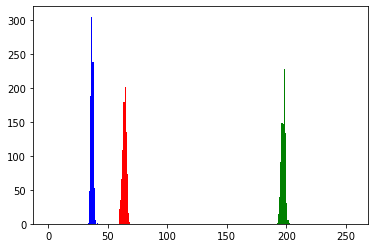

In [13]:
# 학습
train = cv2.imread("chromakey_patch.png")
chromakey_patch = cv2.imread("chromakey_patch.png")
b,g,r = cv2.split(chromakey_patch)
hb = plt.hist(b.ravel(), 256, [0,256], color='b');
hg = plt.hist(g.ravel(), 256, [0,256], color='g');
hr = plt.hist(r.ravel(), 256, [0,256], color='r');

maxb = (np.where( hb[0] == np.max(hb[0]) ))[0][0]
maxg = (np.where( hg[0] == np.max(hg[0]) ))[0][0]
maxr = (np.where( hr[0] == np.max(hr[0]) ))[0][0]

print(maxb, maxg, maxr)

In [22]:
print( np.mean(b) )
print( np.mean(g) )
print( np.mean(r) )

t = 7
p=sp.norm(0,1).pdf(  (9-7)/4  )
print(p)

36.088095238095235
197.12261904761905
564.0
0.3520653267642995


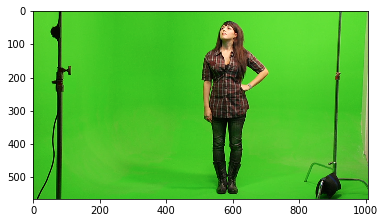

In [15]:
#테스트 적용
test = cv2.imread("chromakey.png")

for r in range(test.shape[0]):
    for c in range(test.shape[1]) :
        if np.array_equal (test[r,c,:], [maxg, maxb, maxr]) :
            test[r,c,:] = 0

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

# 화소 점 처리

In [25]:
img = cv2.imread("lena.png")
print(img.shape)  #높이, 폭, color image
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)  #흑백으로
print(img.shape)

(512, 512, 3)
(512, 512)


### numpy
* 각 원소에 연산이 가능, 벡터끼리 합도 가능
* 연산이 빠름
* 자료 타입을 통일시킴 / numpy의 기본타입은 double type(8byte)

In [30]:
a = np.array([1,6,7,9])
b = np.array([0,13,7.4,0.3])
c = a+b
c

array([ 1. , 19. , 14.4,  9.3])

* Clamping : for문 사용하는 방법이 있겠으나 dtype='int'

In [38]:
print(type(img))
print(type(img[0,0]))
print(type(img[0,0]))
print(type(imgint[0,0]))

<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.int32'>


In [41]:
a = np.array([250,254], dtype="uint8")
b = a+10
print(b)

a = np.array([250,20,254], dtype="int")
b = a+10
print(b)
c = np.clip(b,0,255)   #최솟값, 최댓값 지정
print(c)
d = np.array(c, dtype="uint8")  #다시 uint8로 바꿔야 영상이 잘 출력됨
print(d)


e = [1,1.0,2]
f=np.array(e)

print(type(e[0])) # int
print(type(e[1])) # float
print(type(f[0])) # float64
print(type(f[1])) # float64

[4 8]
[260  30 264]
[255  30 255]
[255  30 255]
<class 'int'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>


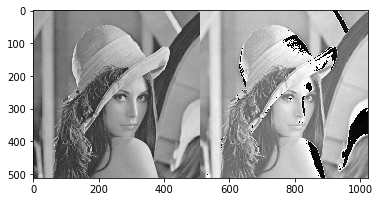

In [44]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)  #흑백으로
imgint = np.array(img, dtype='uint8')
img2 = img+50  #numpy 객체이기때문에 각 원소에 연산하는 것이 가능

plt.imshow(   np.hstack([img, img2]), cmap="gray"   )

* 데이터 변환 - 두 개 같음
img2 = np.array(img, dtype="int")  # create
img2 = img.astype(np.int)  #type 변환

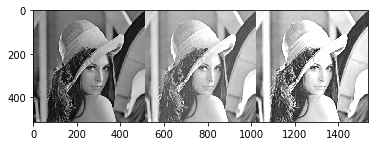

In [61]:
img2 = img.astype(np.int)     #type 확장
img2 += 50                    #연산
img2 = np.clip(img2, 0, 255).astype(np.uint8)  #clipping

img3 = img.astype(np.float32)
img3 *= 1.5
img3 = np.clip(img3, 0, 255).astype(np.uint8)

plt.imshow(   np.hstack([img, img2, img3]), cmap="gray"   )

In [65]:
# 같다

lut1 = [x for x in range(256)]
print(lut1)

lut1 = []
for i in range(256) :
    lut1.append(i)
print(lut1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### LUT 이용하여 선형 변환

* numpy 객체여야 함
* 영상에서 필요한 데이터타입은 uint8

In [84]:
lut1 = [x for x in range(10)]
lut2 = [x+5 for x in range(10)]
lut3 = np.clip(lut2, 5, 9)  #LUT 만듦
lut4 = [np.clip(x+5,5,9) for x in range(10)]
lut5 = [ x+5  if  x+5<=9  else  9    for x in range(10)]
# 삼항연산자: a > b ? 6 : 7 는 C나 JAVA에 있지만 파이썬엔 없음
# if가 뒤에 붙으면 filtering. else가 없음

print(lut1)
print(lut2)
print(lut3)
print(lut4)
print(lut5)

def addlut(op) :
    return np.array([x+op if x+op < 255 else 255 for x in range(256)]).astype("uint8")

def mullut(op) :
    return np.array([x*op if x*op < 255 else 255 for x in range(256)]).astype("uint8")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5 6 7 8 9 9 9 9 9 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]


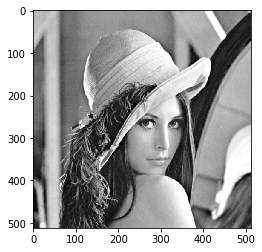

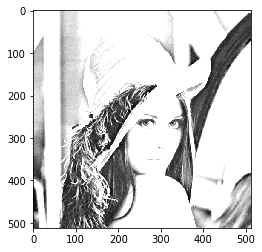

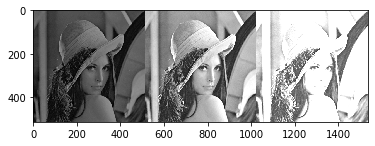

In [91]:
src2 = cv2.LUT(img, mullut(1.2))
plt.imshow(src2, cmap="gray")
plt.show()

src2 = cv2.LUT(img, mullut(2.0))
plt.imshow(src2, cmap="gray")
plt.show()

all = np.hstack([
        cv2.LUT(img, mullut(0.7)), 
        cv2.LUT(img, mullut(1.2)), 
        cv2.LUT(img, mullut(2.0))
])
plt.imshow(all, cmap="gray")
plt.show()

#### binarization, posterizing, inverse

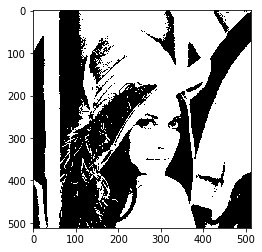

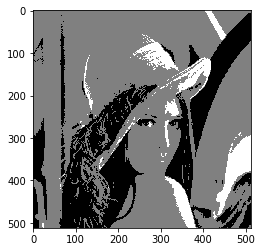

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'cv::LUT'


In [110]:
def binarization_lut(t) :
    return np.array([255 if x > t else 0 for x in range(256)]).astype("uint8")
#    return np.array([ (x > t)*255 for x in range(256)]).astype("uint8")   #자동형변환 이용


def posterizing_lut(l) :
    return np.array([x//l for x in range(256)]).astype("uint8")

def inverse_lut() :
    return np.array([ 255-x for x in range(256)]).astype("uint8")

# error
def specific_lut(min, max) :
    return np.array([ 255 for x in range(256) if x>min and x<max]).astype("uint8")

plt.imshow(cv2.LUT(img, binarization_lut(127)), cmap="gray")
plt.show()
plt.imshow(cv2.LUT(img, posterizing_lut(100)), cmap="gray")
plt.show()
plt.imshow(cv2.LUT(img, specific_lut(120,160)), cmap="gray")
plt.show()

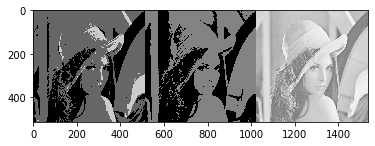

In [7]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

#pf
def posterlut(l) :
    return np.array([  int(x/l)*l for x in range(256)  ]).astype("uint8")

def inverselut() :
    return np.array([255-x for x in range(256)]).astype("uint8")

def gammalut(gamma) :
    invGamma = 1.0 / gamma
    return np.array([   ((i/255.0) ** invGamma) * 255 for i in np.arange(0,256)   ]).astype("uint8")


all = np.hstack([
        cv2.LUT(img, posterlut(100)),  # posterizing
        cv2.LUT(img, posterlut(128)),  # binarization
        cv2.LUT(img, gammalut(2.2))
])
plt.imshow(all, cmap="gray")

(512, 512)
(512, 512, 3)


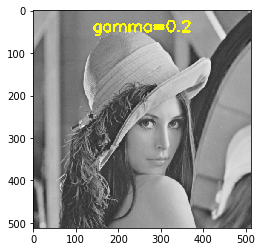

In [25]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE);
print(img.shape)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);   #해야 칼라 annotating 가능, openCV에서는 BGR 이어야
print(col.shape)


cv2.putText(col, "gamma=0.2", (140,50),
           cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,0), 3)

plt.imshow(col)  #글 색상은 RGB


### animation

In [29]:
img = cv2.imread("gamma.jpg")

col = cv2.LUT(img, gammalut(0.5))
cv2.putText(col, "gamma=0.5", (100,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
cv2.imwrite("g1.jpg", col)

col = cv2.LUT(img, gammalut(1.5))
cv2.putText(col, "gamma=1.5", (100,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
cv2.imwrite("g2.jpg", col)

col = cv2.LUT(img, gammalut(2.5))
cv2.putText(col, "gamma=2.5", (100,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
cv2.imwrite("g3.jpg", col)

True

In [39]:
# 위 코드를 for 문으로 작성하면
img = cv2.imread("gamma.jpg")

gm = [0.5, 1.2, 2.5, 3.0]
for i in range(len(gm)) :
    col = cv2.LUT(img, gammalut(gm[i]))
    cv2.putText(col, f"gamma={gm[i]}", (100,30),
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0), 2)
    cv2.imwrite(f"g{i+1}.jpg", np.hstack([img, col]))

In [15]:
from PIL import Image  #클래스 가져올 때는 보통 첫자 대문자

im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

im1.save("out3.gif", save_all=True, append_images=[im2, im3, im4], 
         duration=500, loop=0)

In [ ]:
# 위 코드를 for 문으로 작성하면
from PIL import Image  #클래스 가져올 때는 보통 첫자 대문자

for i in range(len(gm)) :
    "im"+(i+1) = Image.open(f'g{i+1}.jpg')
    im1.save("out4.gif", save_all=True, append_images=[im2, im3, im4], 
             duration=500, loop=0)

im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

<h1>Hello</h1>  
<img src="out.gif" width=300>  
<img src="out2.gif">  
<img src="out3.gif">

#### 한글 폰트

In [30]:
img = cv2.imread("gamma.jpg")
imgPIL = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

r,g,b,a = 255,255,255,0

font = ImageFont.truetype("HMKMMAG.TTF", 20)
draw = ImageDraw.Draw(imgPIL)


draw.text((60,70), "한글", font=font, fill=(b,g,r,a))

imgPIL.save("out_hangul.jpg")

<img src="out_hangul.jpg">

## 화소 영역 처리

In [13]:
# blurring
img = cv2.imread("gamma.jpg", cv2.IMREAD_GRAYSCALE)

K = 11
kernel = np.ones((K,K), np.float32) / (K*K)
print(kernel)

[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00

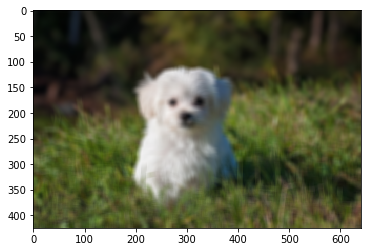

In [6]:
# 블러링
filtered = cv2.filter2D(img, -1, kernel)

plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

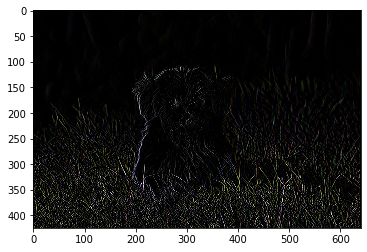

In [9]:
kernel = np.array([ [0,0,0],
                   [-1,0,1],
                   [0,0,0]
                   ])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

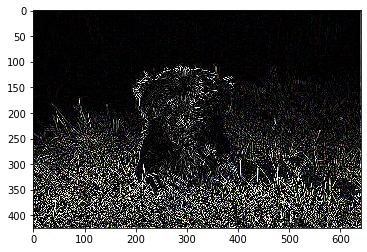

In [11]:
kernel = np.array([ [-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]
                   ])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

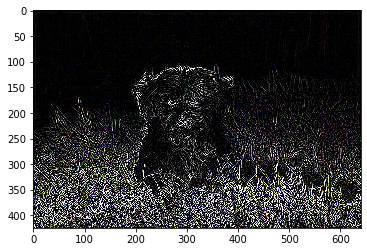

In [12]:
kernel = np.array([ [1,1,1],
                   [1,-8,1],
                   [1,1,1]
                   ])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

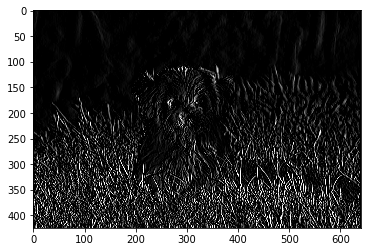

In [15]:
# 미분값 - 수직엣지
kernel = np.array([ [1,0,-1],
                   [1,0,-1],
                   [1,0,-1]
                   ])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

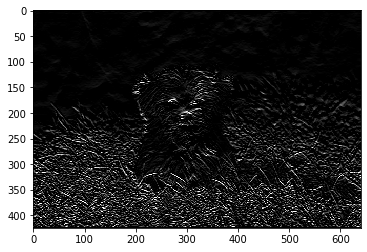

In [16]:
# 미분값 - 수평엣지
kernel = np.array([ [1,1,1],
                   [0,0,0],
                   [-1,-1,-1]
                   ])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))